In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
from pprint import pprint
from IPython.display import clear_output

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [4]:
data = []
nf = []
qnum = 0
load = '.'
c = 0

sys.stdout.write('working')

while c < 3:
    sys.stdout.write(load)
    sys.stdout.flush()
    c += 1
    time.sleep(0.5)
    
for city in cities:
    qurl = f"{url}&q={city}"
    res = requests.get(qurl).json()
    try:
        if(res['message']):
            nf.append(city)
    except:
        data.append({
            "city":res['name'],
            "latitude": res['coord']['lat'],
            "temperature":res['main']['temp'],
            "humidity":res['main']['humidity'],
            "wind_speed":res['wind']['speed'],
            "clouds":res['clouds']['all']
        })
    qnum += 1
    
    if(qnum%10 == 0):
        sys.stdout.write(load)
        sys.stdout.flush()
        time.sleep(7)

print(f"cities found: {len(data)}/{len(cities)}")
df = pd.DataFrame(data)

working..................................................................cities found: 551/620


In [5]:
df.head()

,city,clouds,humidity,latitude,temperature,wind_speed
0,Barrow,0,68,-38.31,43.43,5.61
1,Montana,8,79,43.41,36.86,2.48
2,Tunceli,0,49,39.11,45.43,4.70
3,Chokurdakh,80,100,70.62,31.73,11.10
4,East London,20,66,-33.02,53.60,6.93


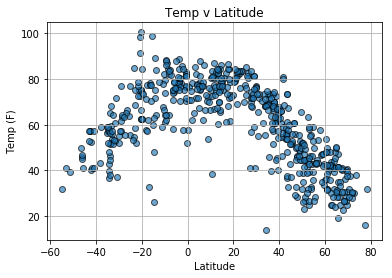

In [6]:
plt.grid()
plt.title("Temp v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
plt.scatter(df['latitude'], df['temperature'], alpha=0.65, edgecolors='black')

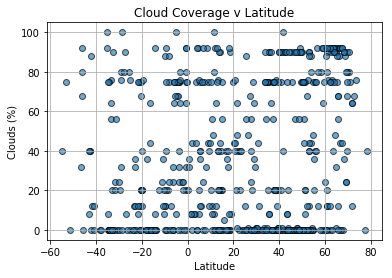

In [7]:
plt.grid()
plt.title("Cloud Coverage v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Clouds (%)")
plt.scatter(df['latitude'], df['clouds'], alpha=0.65, edgecolors='black')

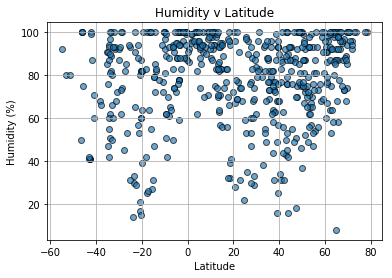

In [8]:
plt.grid()
plt.title("Humidity v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(df['latitude'], df['humidity'], alpha=0.65, edgecolors='black')

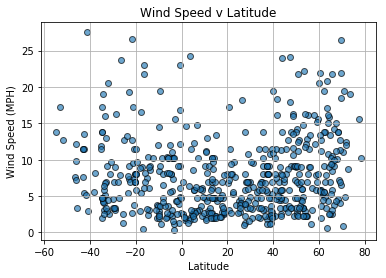

In [9]:
plt.grid()
plt.title("Wind Speed v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.scatter(df['latitude'], df['wind_speed'], alpha=0.65, edgecolors='black')